In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
import os, shutil

In [10]:
# The path to the original directory with lung images
# dataset is uncompressed
original_dataset_dir = '/Users/sandy/Desktop/lung_colon_image_set/lung_image_sets'

# The directory where we will
# store our smaller dataset
base_dir = '/Users/sandy/Desktop/Small Dataset'

# Directories for our training,
# validation and test splits
train = os.path.join(base_dir, 'train')
validation = os.path.join(base_dir, 'validation')
test = os.path.join(base_dir, 'test')

# Directory with our training aca pictures
train_aca_dir = os.path.join(train, 'lung_aca')
os.mkdir(train_aca_dir)

# Directory with our training benign pictures
train_benign_dir = os.path.join(train, 'lung_n')
os.mkdir(train_benign_dir)

# Directory with our validation aca pictures
validation_aca_dir = os.path.join(validation, 'lung_aca')
os.mkdir(validation_aca_dir)

# Directory with our validation benign pictures
validation_benign_dir = os.path.join(validation, 'lung_n')
os.mkdir(validation_benign_dir)

# Directory with our test aca pictures
test_aca_dir = os.path.join(test, 'lung_aca')
os.mkdir(test_aca_dir)

# Directory with our test benign pictures
test_benign_dir = os.path.join(test, 'lung_n')
os.mkdir(test_benign_dir)



FileNotFoundError: [Errno 2] No such file or directory: '/Users/sandy/Desktop/lung_colon_image_set/lung_image_sets\\lungaca0.jpg'

In [13]:
original_aca_dir = '/Users/sandy/Desktop/lung_colon_image_set/lung_image_sets/lung_aca'


# Copy first 160 aca images to train_aca_dir
fnames = ['lungaca{}.jpeg'.format(i) for i in range(1,160)]
for fname in fnames:
    src = os.path.join(original_aca_dir, fname)
    dst = os.path.join(train_aca_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 40 aca images to validation_aca_dir
fnames = ['lungaca{}.jpeg'.format(i) for i in range(160, 200)]
for fname in fnames:
    src = os.path.join(original_aca_dir, fname)
    dst = os.path.join(validation_aca_dir, fname)
    shutil.copyfile(src, dst)
    


FileNotFoundError: [Errno 2] No such file or directory: '/Users/sandy/Desktop/lung_colon_image_set/lung_image_sets/lung_aca\\cat.200.jpeg'

In [14]:
# Copy next 50 aca images to test_aca_dir
fnames = ['lungaca{}.jpeg'.format(i) for i in range(200, 250)]
for fname in fnames:
    src = os.path.join(original_aca_dir, fname)
    dst = os.path.join(test_aca_dir, fname)
    shutil.copyfile(src, dst)

In [16]:
original_benign_dir = '/Users/sandy/Desktop/lung_colon_image_set/lung_image_sets/lung_n'

# Copy first 160 benign images to train_benign_dir
fnames = ['lungn{}.jpeg'.format(i) for i in range(1,160)]
for fname in fnames:
    src = os.path.join(original_benign_dir, fname)
    dst = os.path.join(train_benign_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 40 benign images to validation_benign_dir
fnames = ['lungn{}.jpeg'.format(i) for i in range(160, 200)]
for fname in fnames:
    src = os.path.join(original_benign_dir, fname)
    dst = os.path.join(validation_benign_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 50 benign images to test_benign_dir
fnames = ['lungn{}.jpeg'.format(i) for i in range(200, 250)]
for fname in fnames:
    src = os.path.join(original_benign_dir, fname)
    dst = os.path.join(test_benign_dir, fname)
    shutil.copyfile(src, dst)

In [17]:
# forgot to change 160 to 161
print('total training aca images:', len(os.listdir(train_aca_dir)))

total training aca images: 159


In [18]:
print('total training benign images:', len(os.listdir(train_benign_dir)))
print('total validation aca images:', len(os.listdir(validation_aca_dir)))
print('total validation benign images:', len(os.listdir(validation_benign_dir)))
print('total test aca images:', len(os.listdir(test_aca_dir)))
print('total test benign images:', len(os.listdir(test_benign_dir)))

total training benign images: 159
total validation aca images: 40
total validation benign images: 40
total test aca images: 50
total test benign images: 50


In [19]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [21]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [24]:
import cv2
cv2.imread('/Users/sandy/Desktop/Small Dataset/train/lung_aca/lungaca1.jpeg')

ModuleNotFoundError: No module named 'cv2'

In [31]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=5,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

Found 318 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [32]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (5, 150, 150, 3)
labels batch shape: (5,)


In [36]:
history = model.fit(
      train_generator,
      steps_per_epoch=3,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=3)

Epoch 1/30
3/3 [==============================] - 0s 193ms/step - loss: 0.0139 - acc: 1.0000 - val_loss: 1.8830 - val_acc: 0.9333
Epoch 2/30
3/3 [==============================] - 0s 166ms/step - loss: 2.5493e-04 - acc: 1.0000 - val_loss: 3.0932e-04 - val_acc: 1.0000
Epoch 3/30
3/3 [==============================] - 0s 173ms/step - loss: 3.6572e-05 - acc: 1.0000 - val_loss: 9.8515e-04 - val_acc: 1.0000
Epoch 4/30
3/3 [==============================] - 0s 167ms/step - loss: 3.1513e-05 - acc: 1.0000 - val_loss: 1.9576 - val_acc: 0.8667
Epoch 5/30
3/3 [==============================] - 0s 194ms/step - loss: 1.4357e-05 - acc: 1.0000 - val_loss: 0.0430 - val_acc: 1.0000
Epoch 6/30
3/3 [==============================] - 0s 167ms/step - loss: 0.0084 - acc: 1.0000 - val_loss: 4.4658e-04 - val_acc: 1.0000
Epoch 7/30
3/3 [==============================] - 0s 168ms/step - loss: 5.8497e-06 - acc: 1.0000 - val_loss: 2.8940e-05 - val_acc: 1.0000
Epoch 8/30
3/3 [==============================] - 0s 1

In [37]:
model.save('small_lung1.h5')

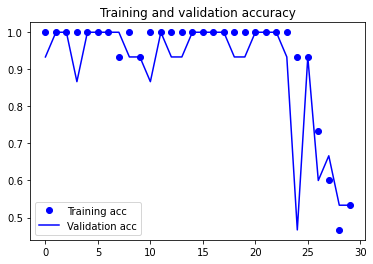

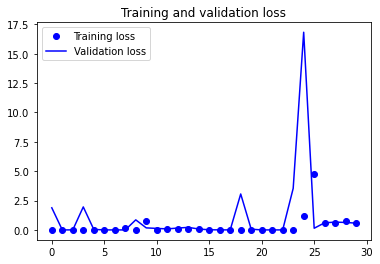

In [38]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [39]:
train_generator.class_indices

{'lung_aca': 0, 'lung_n': 1}

# early stopping

In [8]:
import tensorflow as tf
from tensorflow import keras

new_model = tf.keras.models.load_model('/Users/sandy/Desktop/small_lung1.h5')

In [9]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
import os
base_dir = '/Users/sandy/Desktop/Small Dataset'

train = os.path.join(base_dir, 'train')
validation = os.path.join(base_dir, 'validation')
test = os.path.join(base_dir, 'test')


In [11]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   horizontal_flip = 'true')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=5,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

Found 478 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8)
history = new_model.fit(
      train_generator,
      steps_per_epoch=3,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=5, callbacks=[callback])

Epoch 1/50
3/3 [==============================] - 1s 372ms/step - loss: 0.5920 - acc: 0.4000 - val_loss: 0.4669 - val_acc: 0.4400
Epoch 2/50
3/3 [==============================] - 1s 215ms/step - loss: 0.4789 - acc: 0.3333 - val_loss: 0.7672 - val_acc: 0.3200
Epoch 3/50
3/3 [==============================] - 1s 213ms/step - loss: -0.3981 - acc: 0.5333 - val_loss: 4.6039 - val_acc: 0.4000
Epoch 4/50
3/3 [==============================] - 1s 206ms/step - loss: -28.0111 - acc: 0.2000 - val_loss: -2.4410 - val_acc: 0.3200
Epoch 5/50
3/3 [==============================] - 1s 208ms/step - loss: 35.8326 - acc: 0.5333 - val_loss: -23.9377 - val_acc: 0.4400
Epoch 6/50
3/3 [==============================] - 1s 211ms/step - loss: 20.6984 - acc: 0.2667 - val_loss: 11.0517 - val_acc: 0.3600
Epoch 7/50
3/3 [==============================] - 1s 233ms/step - loss: -4.3371 - acc: 0.3333 - val_loss: 5.2276 - val_acc: 0.3200
Epoch 8/50
3/3 [==============================] - 1s 213ms/step - loss: 2.3570 -

# validation accuracy of 0.32 and loss of 0.25

In [27]:
test_generator = test_datagen.flow_from_directory(
        test,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical', shuffle=False)

test_loss, test_acc = new_model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 650 images belonging to 3 classes.
50/50 [==============================] - 5s 97ms/step - loss: 15.5677 - acc: 0.3333
test acc: 0.33333340287208557


In [28]:
import numpy as np
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = new_model.predict(test_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [29]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   

In [30]:
class_labels

['lung_aca', 'lung_n', 'lung_scc']

In [31]:
from sklearn import metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   

              precision    recall  f1-score   support

    lung_aca       0.08      1.00      0.14        50
      lung_n       0.00      0.00      0.00        50
    lung_scc       0.00      0.00      0.00       550

    accuracy                           0.08       650
   macro avg       0.03      0.33      0.05       650
weighted avg       0.01      0.08      0.01       650



C:\Users\sandy\anaconda3_2nd_download\envs\metis\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sandy\anaconda3_2nd_download\envs\metis\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sandy\anaconda3_2nd_download\envs\metis\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [32]:
predictions = new_model.predict(test_generator)

In [33]:
from sklearn.metrics import confusion_matrix
Y_pred = new_model.predict(validation_generator, test_generator.samples / test_generator.batch_size)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

Confusion Matrix
[[40  0  0]
 [40  0  0]
 [40  0  0]]
